# Esercitazione 6
In questa esercitazione vogliamo simulare il modello di Ising 1-dimensionale. Consideriamo quindi una catena di $N$ oggetti (con condizioni periodiche al contorno) che interagiscono con un campo magnetico esterno $h$ e con i loro immediati vicini come descritto dall'Hamiltoniana
$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1})
$$
dove abbiamo considerato $\mu_B=1$, $k_B=1$, $\{s_i\}$ sono variabili di spin che assumono un valore in $\{-1;1\}$ e $J>0$ (è favorito l'allineamento degli spin). 

Questo modello ha l'importante vantaggio di essere risolubile analiticamente: possiamo quindi confrontare i risultati delle nostre simulazioni con le soluzioni note.

Le grandezze che vogliamo stimare sono:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

in un sistema di $N=50$ spin con $J=1.0$, campionando il range di temperature (in $K$) $[0.5,2.0]$.

Per evolvere le configurazioni del sistema abbiamo bisogno di campionare la distribuzione di probabilità degli stati (distribuzione di Boltzmann):
$$
p(\mu)=\frac{e^{-\beta E_\mu}}{Z}
$$
dove abbiamo caratterizzato uno specifico stato con $\mu$, $\beta=1/k_BT$ e $Z$ è la funzione di partizione del sistema. Abbiamo implementato questa possibilità in due modi:
- Algoritmo di Metropolis
- Sampling di Gibbs

Il metodo da utilizzare viene comunicato al programma mediante una variabile <font face="Courier">bool metro</font> fornita in input (<font face="Courier">true</font> per utilizzare l'agoritmo di Metropolis, <font face="Courier">false</font> per utilizzare il campionmento in Gibbs). Abbiamo inoltre implementato la possibilità di fare ripartire la simulazione da una configurazione di spin nota (prodotta da una simulazione precedente), utile per gestire l'equilibrazione del sistema.

## Equilibrazione
All'inizio della prima simulazione, il sistema viene creato nella configurazione caratteristica di una temperatura infinita: tutti gli spin sono allineati casualmente. Si ha quindi una fase di equilibrazione, in cui il sistema evolve verso stati più probabili alla temperatura impostata per la simulazione. Per valutare quando questo processo è terminato, si possono rappresentare graficamente alcune grandezze statistiche di interesse (in questo caso $U/N$ energia interna per particella e $M/N$ magnetizzazione per particella - con $h=0.02$). L'equilibrazione è raggiunta quando le grandezze considerate oscillano attorno ad un valore stabile.

In [1]:
#showing U and M with h=0.02
import matplotlib.pyplot as plt
import numpy as np

uM05, mM05 = np.loadtxt('equilibration/equilibrationM05.dat',unpack=True,usecols=(0,1))
uM10, mM10 = np.loadtxt('equilibration/equilibrationM10.dat',unpack=True,usecols=(0,1))
uM15, mM15 = np.loadtxt('equilibration/equilibrationM15.dat',unpack=True,usecols=(0,1))
uG05, mG05 = np.loadtxt('equilibration/equilibrationG05.dat',unpack=True,usecols=(0,1))
uG10, mG10 = np.loadtxt('equilibration/equilibrationG10.dat',unpack=True,usecols=(0,1))
uG15, mG15 = np.loadtxt('equilibration/equilibrationG15.dat',unpack=True,usecols=(0,1))

x = np.arange(uM05.size)

Text(0.5, 1.0, 'Gibbs - T=1.5 K')

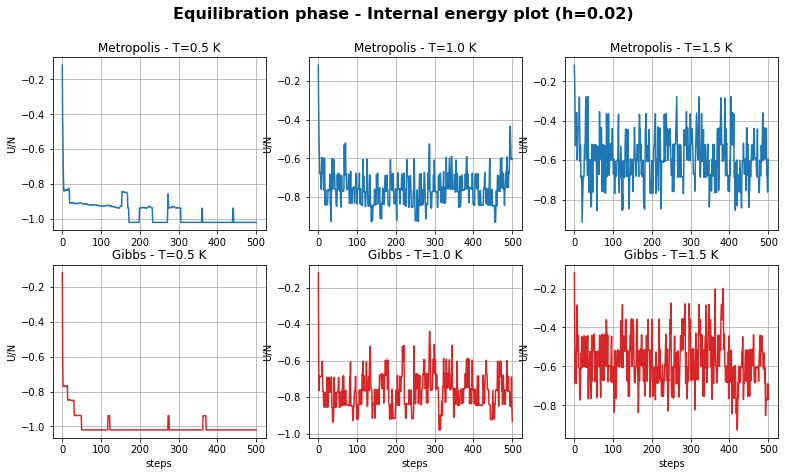

In [2]:
plt.figure(figsize=(13,7))
plt.suptitle('Equilibration phase - Internal energy plot (h=0.02)',fontweight='bold',fontsize=16)

plt.subplot(231)
plt.plot(x,uM05)
plt.grid(True)
#plt.xlabel('steps')
plt.ylabel('U/N')
plt.title('Metropolis - T=0.5 K')

plt.subplot(232)
plt.plot(x,uM10)
plt.grid(True)
#plt.xlabel('steps')
plt.ylabel('U/N')
plt.title('Metropolis - T=1.0 K')

plt.subplot(233)
plt.plot(x,uM15)
plt.grid(True)
#plt.xlabel('steps')
plt.ylabel('U/N')
plt.title('Metropolis - T=1.5 K')

plt.subplot(234)
plt.plot(x,uG05,color='tab:red')
plt.grid(True)
plt.xlabel('steps')
plt.ylabel('U/N')
plt.title('Gibbs - T=0.5 K')

plt.subplot(235)
plt.plot(x,uG10,color='tab:red')
plt.grid(True)
plt.xlabel('steps')
plt.ylabel('U/N')
plt.title('Gibbs - T=1.0 K')

plt.subplot(236)
plt.plot(x,uG15,color='tab:red')
plt.grid(True)
plt.xlabel('steps')
plt.ylabel('U/N')
plt.title('Gibbs - T=1.5 K')

Text(0.5, 1.0, 'Gibbs - T=1.5 K')

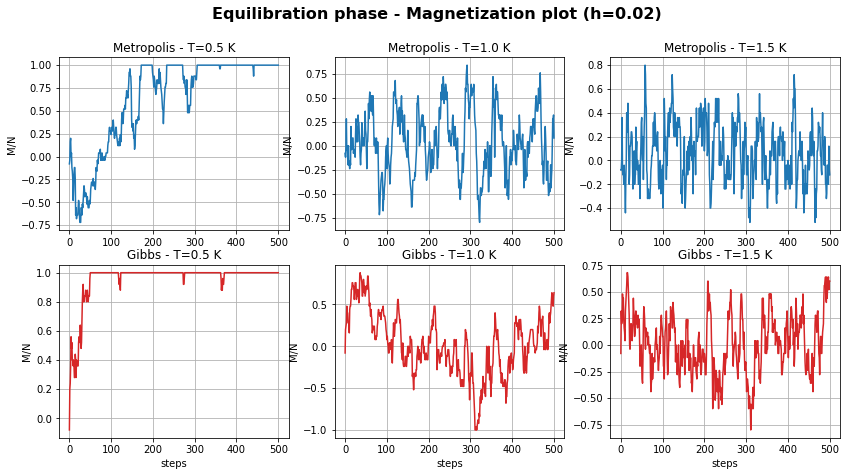

In [3]:
plt.figure(figsize=(14,7))
plt.suptitle('Equilibration phase - Magnetization plot (h=0.02)',fontweight='bold',fontsize=16)

plt.subplot(231)
plt.plot(x,mM05)
plt.grid(True)
#plt.xlabel('steps')
plt.ylabel('M/N')
plt.title('Metropolis - T=0.5 K')

plt.subplot(232)
plt.plot(x,mM10)
plt.grid(True)
#plt.xlabel('steps')
plt.ylabel('M/N')
plt.title('Metropolis - T=1.0 K')

plt.subplot(233)
plt.plot(x,mM15)
plt.grid(True)
#plt.xlabel('steps')
plt.ylabel('M/N')
plt.title('Metropolis - T=1.5 K')

plt.subplot(234)
plt.plot(x,mG05,color='tab:red')
plt.grid(True)
plt.xlabel('steps')
plt.ylabel('M/N')
plt.title('Gibbs - T=0.5 K')

plt.subplot(235)
plt.plot(x,mG10,color='tab:red')
plt.grid(True)
plt.xlabel('steps')
plt.ylabel('M/N')
plt.title('Gibbs - T=1.0 K')

plt.subplot(236)
plt.plot(x,mG15,color='tab:red')
plt.grid(True)
plt.xlabel('steps')
plt.ylabel('M/N')
plt.title('Gibbs - T=1.5 K')

L'equilibrio è raggiunto piuttosto rapidamente: nei casi più restrittivi di $T=0.5K$, qualche centinaio di passi è sufficiente. Abbiamo quindi deciso di iniziare le misure del sistema alla prima ripartenza del programma, che avviene dopo $10^3$ passi.

## Risultati
Abbiamo campionato l'intervallo di temperature a passi di $\Delta T=0.2$ in $T\in [1.0,2.0]$, $\Delta T=0.1$ in $T\in [0.5,1.0]$  in quanto spesso (soprattutto nel caso della capacità termica $C$)le grandezze considerate variano sensibilmente nel secondo range. Abbiamo inoltre utilizzato $20$ blocchi da $10^4$ e $10^5$ dati ciascuno rispettivamente per il primo e secondo intervallo: questo accorgimento ha permesso di ottenere stime più precise in quanto a basse temperature gli errori calcolati sulla media (a parità di numero di dati utilizzati) aumentano.

In tutti i casi riportiamo i dati ottenuti con l'algoritmo di Metropolis e di Gibbs confrontati con la curva analitica e un'analisi della compatibilità tra simulazione e teoria.

In [4]:
#define analytical solutions, load data
import matplotlib.pyplot as plt
import numpy as np

def Umodel(T,J,N):
    beta = 1/T
    frac = (1+np.tanh(beta*J)**(N-2))/(1+np.tanh(beta*J)**N)
    return -J*np.tanh(beta*J)*frac

def ChiModel(T,J,N):
    beta = 1/T
    tanhN = np.tanh(beta*J)**N
    return beta*np.exp(2*beta*J)*(1-tanhN)/(1+tanhN)

def HeatModel(T,J,N):
    beta = 1/T
    th = np.tanh(J/T)
    thN= th**N
    ch = 1/th
    heat=((beta*J)**2)*(((1+thN+(N-1)*(th**2)+(N-1)*(ch**2)*thN)/(1+thN))-N*((th+ch*thN)/(1+thN))**2)
    return heat

def MagModel(T,J,N,h):
    b=1./T
    l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
    l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
    Z = l1**N + l2**N
    M = (np.exp(b*J)*np.sinh(b*h)*((l1**(N-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(N-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
    return(M)

x  = np.linspace(0.4,2.1)
yU = Umodel(x,1.,50.)
yX = ChiModel(x,1.,50.)
yH = HeatModel(x,1.,50.)
yM = MagModel(x,1.,50.,0.02)
zero = np.zeros(x.size)

#Metropolis data
metroT,metroU,metroerrU,metroC,metroerrC,metroX,metroerrX = np.loadtxt('metropolis/final.dat',unpack=True, usecols=(0,1,2,3,4,5,6)) ### h=0.
metroM,metroerrM = np.loadtxt('metropolis/finalh.dat',unpack=True,usecols=(7,8)) ### h=0.02

#Gibbs data
gibbsT,gibbsU,gibbserrU,gibbsC,gibbserrC,gibbsX,gibbserrX = np.loadtxt('gibbs/final.dat',unpack=True, usecols=(0,1,2,3,4,5,6))
gibbsM, gibbserrM = np.loadtxt('gibbs/finalh.dat',unpack=True,usecols=(7,8)) 

### Energia interna

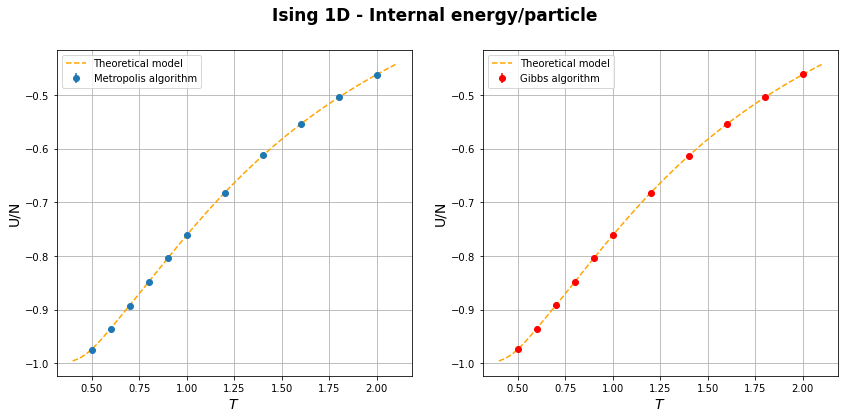

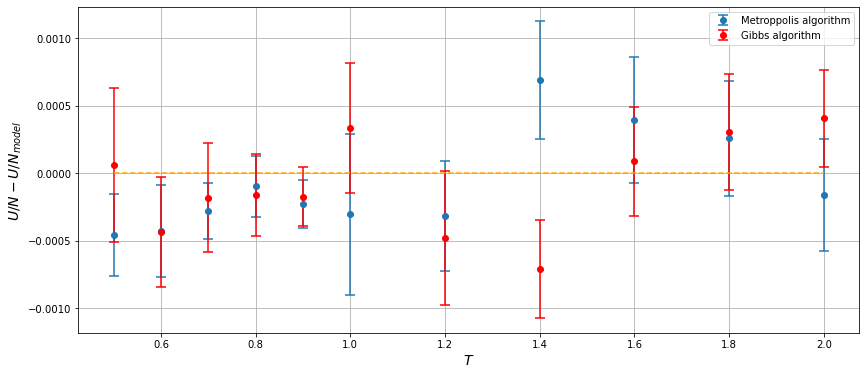

In [5]:
plt.figure(figsize=(14,6))
plt.suptitle('Ising 1D - Internal energy/particle',weight='bold',fontsize=17)

#plotting data
plt.subplot(121)
plt.errorbar(metroT,metroU,metroerrU,label='Metropolis algorithm',fmt='o')
plt.plot(x,yU,'--',label='Theoretical model',color='orange')
plt.grid(True)
plt.xlabel('$T $',fontsize=14)
plt.ylabel('U/N',fontsize=14)
plt.legend()

plt.subplot(122)
plt.errorbar(gibbsT,gibbsU,gibbserrU,label='Gibbs algorithm',fmt='ro')
plt.plot(x,yU,'--',label='Theoretical model',color='orange')
plt.grid(True)
plt.xlabel('$T $',fontsize=14)
plt.ylabel('U/N',fontsize=14)
plt.legend()


#compatibility test
plt.figure(figsize=(14,6))
plt.errorbar(metroT,metroU-Umodel(metroT,1.,50.),metroerrU,label='Metroppolis algorithm',fmt='o',capsize=5, capthick=1.5)
plt.errorbar(gibbsT,gibbsU-Umodel(gibbsT,1.,50.),gibbserrU,label='Gibbs algorithm',fmt='ro',capsize=5, capthick=1.5)
plt.plot(metroT,np.zeros(metroT.size),'--',color='orange')
plt.grid(True)
plt.xlabel('$T $',fontsize=14)
plt.ylabel('$U/N - U/N_{model}$',fontsize=14)
plt.legend()


### Capacità termica

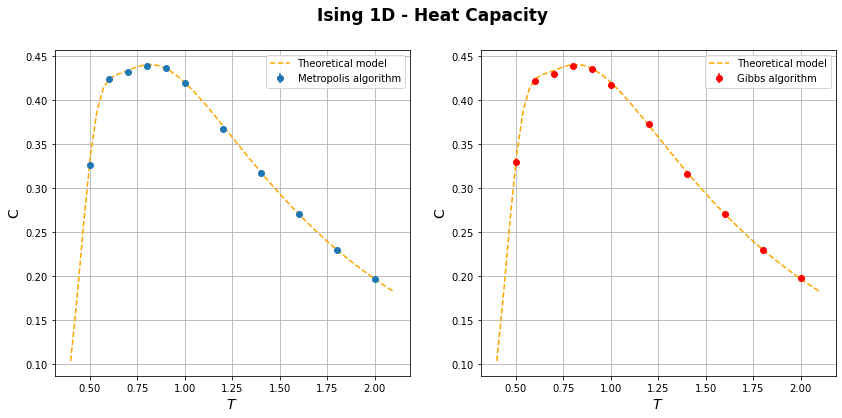

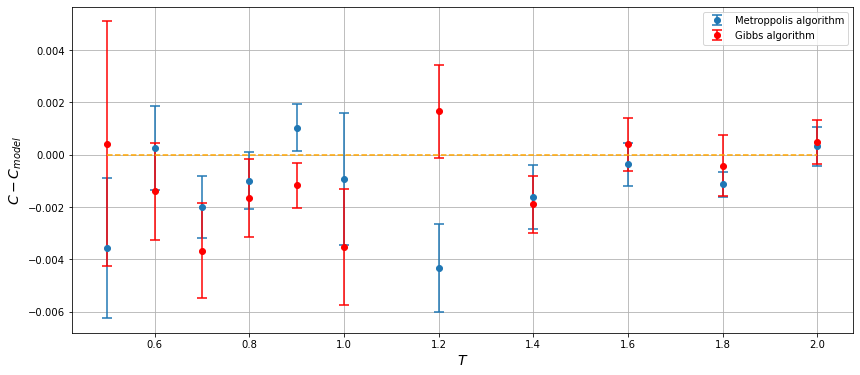

In [6]:
plt.figure(figsize=(14,6))
plt.suptitle('Ising 1D - Heat Capacity',weight='bold',fontsize=17)

#plotting data
plt.subplot(121)
plt.errorbar(metroT,metroC,metroerrC,label='Metropolis algorithm',fmt='o')
plt.plot(x,yH,'--',label='Theoretical model',color='orange')
plt.grid(True)
plt.xlabel('$T $',fontsize=14)
plt.ylabel('C',fontsize=14)
plt.legend()

plt.subplot(122)
plt.errorbar(gibbsT,gibbsC,gibbserrC,label='Gibbs algorithm',fmt='ro')
plt.plot(x,yH,'--',label='Theoretical model',color='orange')
plt.grid(True)
plt.xlabel('$T $',fontsize=14)
plt.ylabel('C',fontsize=14)
plt.legend()


#compatibility test
plt.figure(figsize=(14,6))
plt.errorbar(metroT,metroC-HeatModel(metroT,1.,50.),metroerrC,label='Metroppolis algorithm',fmt='o',capsize=5, capthick=1.5)
plt.errorbar(gibbsT,gibbsC-HeatModel(gibbsT,1.,50.),gibbserrC,label='Gibbs algorithm',fmt='ro',capsize=5, capthick=1.5)
plt.plot(metroT,np.zeros(metroT.size),'--',color='orange')
plt.grid(True)
plt.xlabel('$T $',fontsize=14)
plt.ylabel('$C - C_{model}$',fontsize=14)
plt.legend()

### Suscettività magnetica

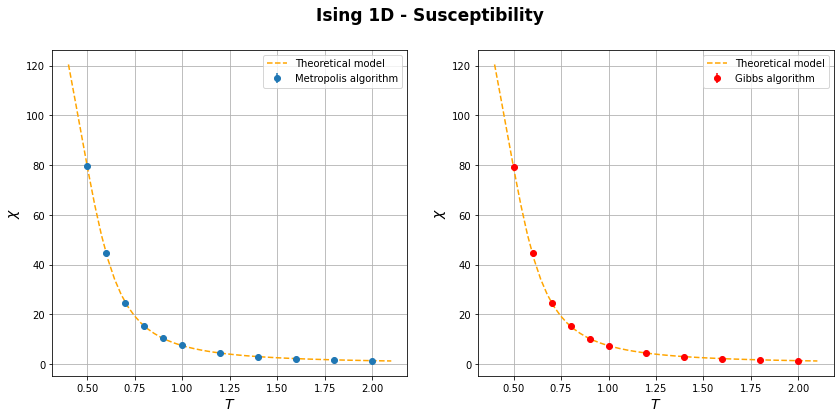

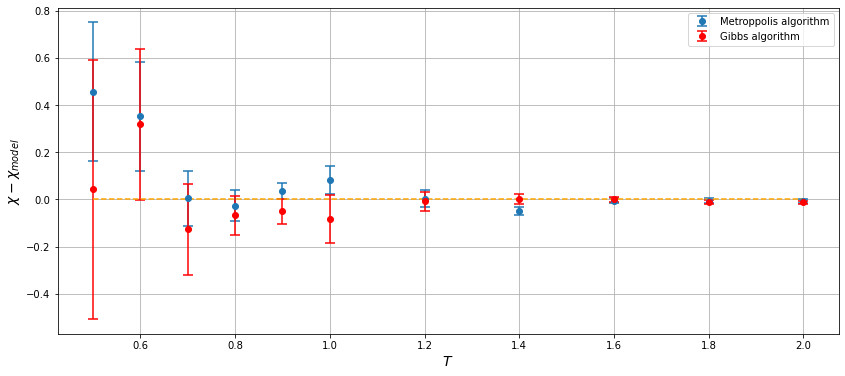

In [7]:
plt.figure(figsize=(14,6))
plt.suptitle('Ising 1D - Susceptibility',weight='bold',fontsize=17)

#plotting data
plt.subplot(121)
plt.errorbar(metroT,metroX,metroerrX,label='Metropolis algorithm',fmt='o')
plt.plot(x,yX,'--',label='Theoretical model',color='orange')
plt.grid(True)
plt.xlabel('$T $',fontsize=14)
plt.ylabel('$\chi$',fontsize=14)
plt.legend()

plt.subplot(122)
plt.errorbar(gibbsT,gibbsX,gibbserrX,label='Gibbs algorithm',fmt='ro')
plt.plot(x,yX,'--',label='Theoretical model',color='orange')
plt.grid(True)
plt.xlabel('$T $',fontsize=14)
plt.ylabel('$\chi$',fontsize=14)
plt.legend()


#compatibility test
plt.figure(figsize=(14,6))
plt.errorbar(metroT,metroX-ChiModel(metroT,1.,50.),metroerrX,label='Metroppolis algorithm',fmt='o',capsize=5, capthick=1.5)
plt.errorbar(gibbsT,gibbsX-ChiModel(gibbsT,1.,50.),gibbserrX,label='Gibbs algorithm',fmt='ro',capsize=5, capthick=1.5)
plt.plot(metroT,np.zeros(metroT.size),'--',color='orange')
plt.grid(True)
plt.xlabel('$T $',fontsize=14)
plt.ylabel('$\chi - \chi_{model}$',fontsize=14)
plt.legend()

### Magnetizzazione

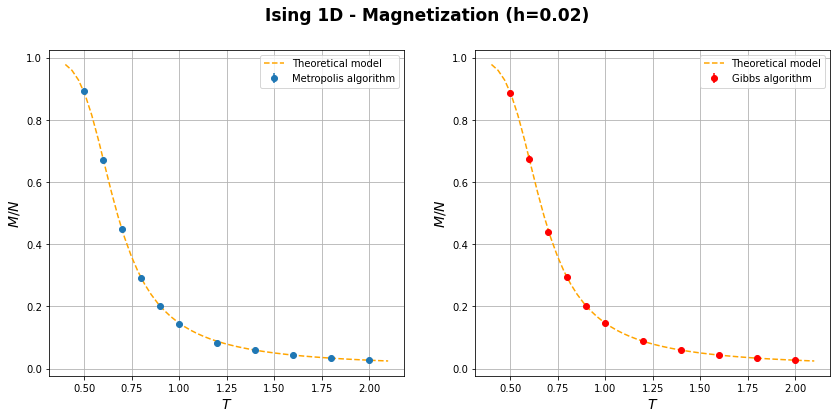

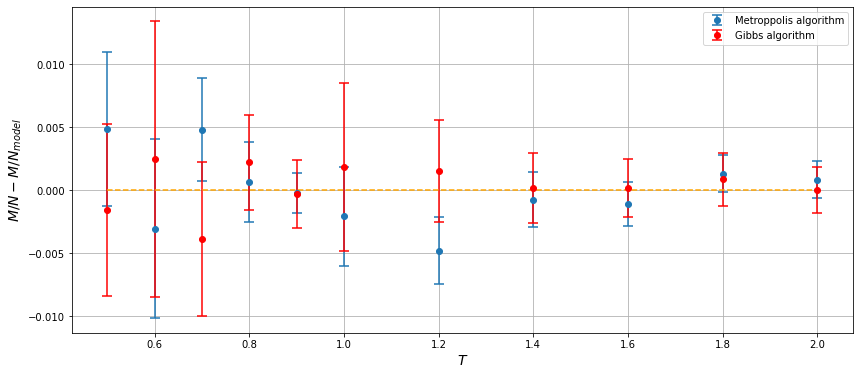

In [8]:
plt.figure(figsize=(14,6))
plt.suptitle('Ising 1D - Magnetization (h=0.02)',weight='bold',fontsize=17)

#plotting data
plt.subplot(121)
plt.errorbar(metroT,metroM,metroerrM,label='Metropolis algorithm',fmt='o')
plt.plot(x,yM,'--',label='Theoretical model',color='orange')
plt.grid(True)
plt.xlabel('$T $',fontsize=14)
plt.ylabel('$M/N$',fontsize=14)
plt.legend()

plt.subplot(122)
plt.errorbar(gibbsT,gibbsM,gibbserrM,label='Gibbs algorithm',fmt='ro')
plt.plot(x,yM,'--',label='Theoretical model',color='orange')
plt.grid(True)
plt.xlabel('$T $',fontsize=14)
plt.ylabel('$M/N$',fontsize=14)
plt.legend()


#compatibility test
plt.figure(figsize=(14,6))
plt.errorbar(metroT,metroM-MagModel(metroT,1.,50.,0.02),metroerrM,label='Metroppolis algorithm',fmt='o',capsize=5, capthick=1.5)
plt.errorbar(gibbsT,gibbsM-MagModel(gibbsT,1.,50.,0.02),gibbserrM,label='Gibbs algorithm',fmt='ro',capsize=5, capthick=1.5)
plt.plot(metroT,np.zeros(metroT.size),'--',color='orange')
plt.grid(True)
plt.xlabel('$T $',fontsize=14)
plt.ylabel('$M/N - M/N_{model}$',fontsize=14)
plt.legend()